In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to your dataset
train_dir = '/content/drive/MyDrive/RiceLeafsDisease/train'
test_dir = '/content/drive/MyDrive/RiceLeafsDisease/test'

In [ ]:
import os
# Get the class labels from the folder names in the train directory
train_labels = sorted(os.listdir(train_dir))

# Get the class labels from the folder names in the test directory
test_labels = sorted(os.listdir(test_dir))

In [ ]:
# Print the class labels
print('Train Class Labels:', train_labels)
print('Test Class Labels:', test_labels)


Train Class Labels: ['bacterial_leaf_blight', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot']
Test Class Labels: ['bacterial_leaf_blight', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot']


In [ ]:
# Define the class labels in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']


In [ ]:
# Set the image size and batch size
image_size = (800, 800)
batch_size = 32


In [ ]:
# Data augmentation and normalization for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    horizontal_flip=True)  # Randomly flip images horizontally


In [ ]:
# Load the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names)


Found 1280 images belonging to 4 classes.


In [ ]:
# Normalization for testing dataset (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
# Load the testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names)

Found 320 images belonging to 4 classes.


In [ ]:
# Print the train labels
train_labels = train_generator.classes
print("Train Labels:")
print(train_labels)

# Print the test labels
test_labels = test_generator.classes
print("Test Labels:")
print(test_labels)

Train Labels:
[0 0 0 ... 3 3 3]
Test Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


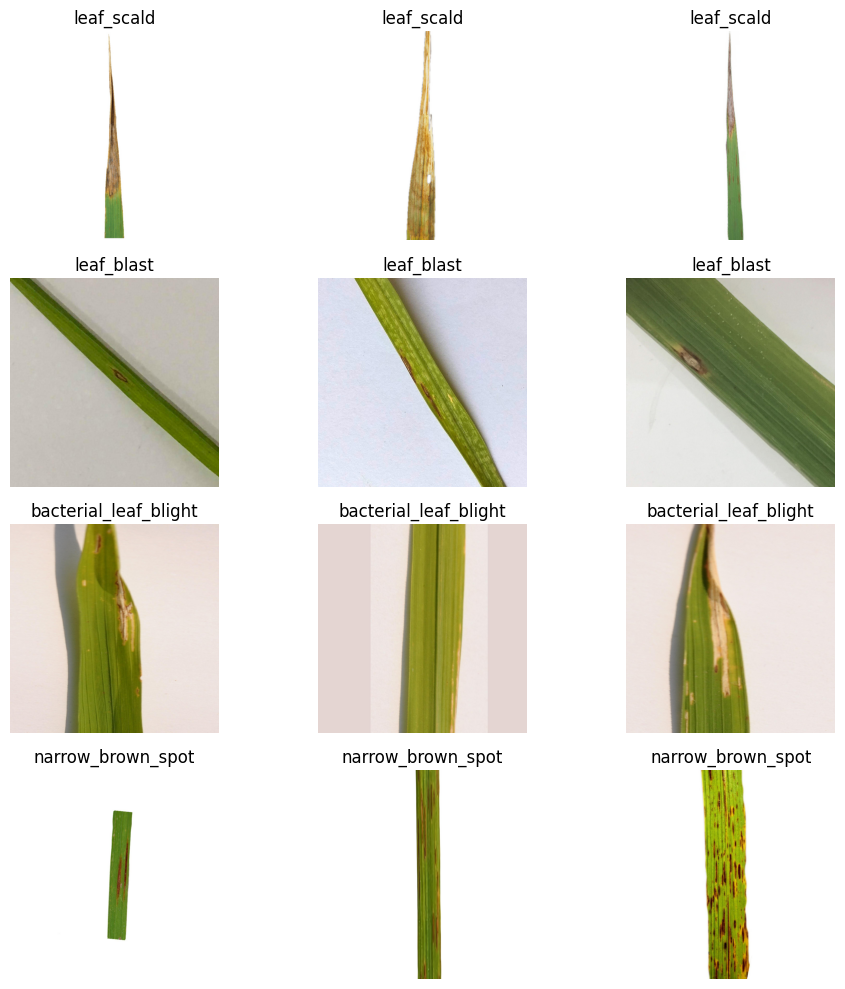

In [ ]:
# Visualize sample images from each class
num_samples_per_class = 3
# Retrieve a batch of images and labels from the test generator
images, labels = next(test_generator)
# Plot sample images
fig, axes = plt.subplots(len(class_names), num_samples_per_class, figsize=(10, 10))

for i, ax in enumerate(axes):
    class_images = images[np.argmax(labels, axis=1) == i]
    class_name = class_names[i]

    num_samples = min(num_samples_per_class, class_images.shape[0])

    for j in range(num_samples):
        # Display sample images
        ax[j].imshow(class_images[j])
        ax[j].axis('off')
        ax[j].set_title(class_name)

    for j in range(num_samples, num_samples_per_class):
        # Remove unused subplots
        ax[j].remove()

plt.tight_layout()
plt.show()


In [ ]:

# Define the CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Assuming 4 disease classes
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 798, 798, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 399, 399, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 397, 397, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 198, 198, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 196, 196, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 98, 128)      0

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# Train the model
model.fit(train_generator, epochs=30)

Epoch 1/30
40/40 [==============================] - 853s 21s/step - loss: 9.7976 - accuracy: 0.5133
Epoch 2/30
40/40 [==============================] - 232s 6s/step - loss: 0.6305 - accuracy: 0.7812
Epoch 3/30
40/40 [==============================] - 231s 6s/step - loss: 0.4676 - accuracy: 0.8375
Epoch 4/30
40/40 [==============================] - 230s 6s/step - loss: 0.3165 - accuracy: 0.9016
Epoch 5/30
40/40 [==============================] - 232s 6s/step - loss: 0.2742 - accuracy: 0.9125
Epoch 6/30
40/40 [==============================] - 234s 6s/step - loss: 0.2011 - accuracy: 0.9297
Epoch 7/30
40/40 [==============================] - 231s 6s/step - loss: 0.4174 - accuracy: 0.8594
Epoch 8/30
40/40 [==============================] - 230s 6s/step - loss: 0.4934 - accuracy: 0.8398
Epoch 9/30
40/40 [==============================] - 233s 6s/step - loss: 0.2829 - accuracy: 0.9023
Epoch 10/30
40/40 [==============================] - 233s 6s/step - loss: 0.1980 - accuracy: 0.9328
Epoch 11

In [17]:
# Evaluate the model on the training dataset
train_loss, train_acc = model.evaluate(train_generator)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_acc)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

40/40 [==============================] - 243s 6s/step - loss: 0.0296 - accuracy: 0.9906
Train Loss: 0.02962310239672661
Train Accuracy: 0.9906250238418579
10/10 [==============================] - 195s 22s/step - loss: 0.1862 - accuracy: 0.9625
Test Loss: 0.18622371554374695
Test Accuracy: 0.9624999761581421


2/2 [==============================] - 0s 163ms/step


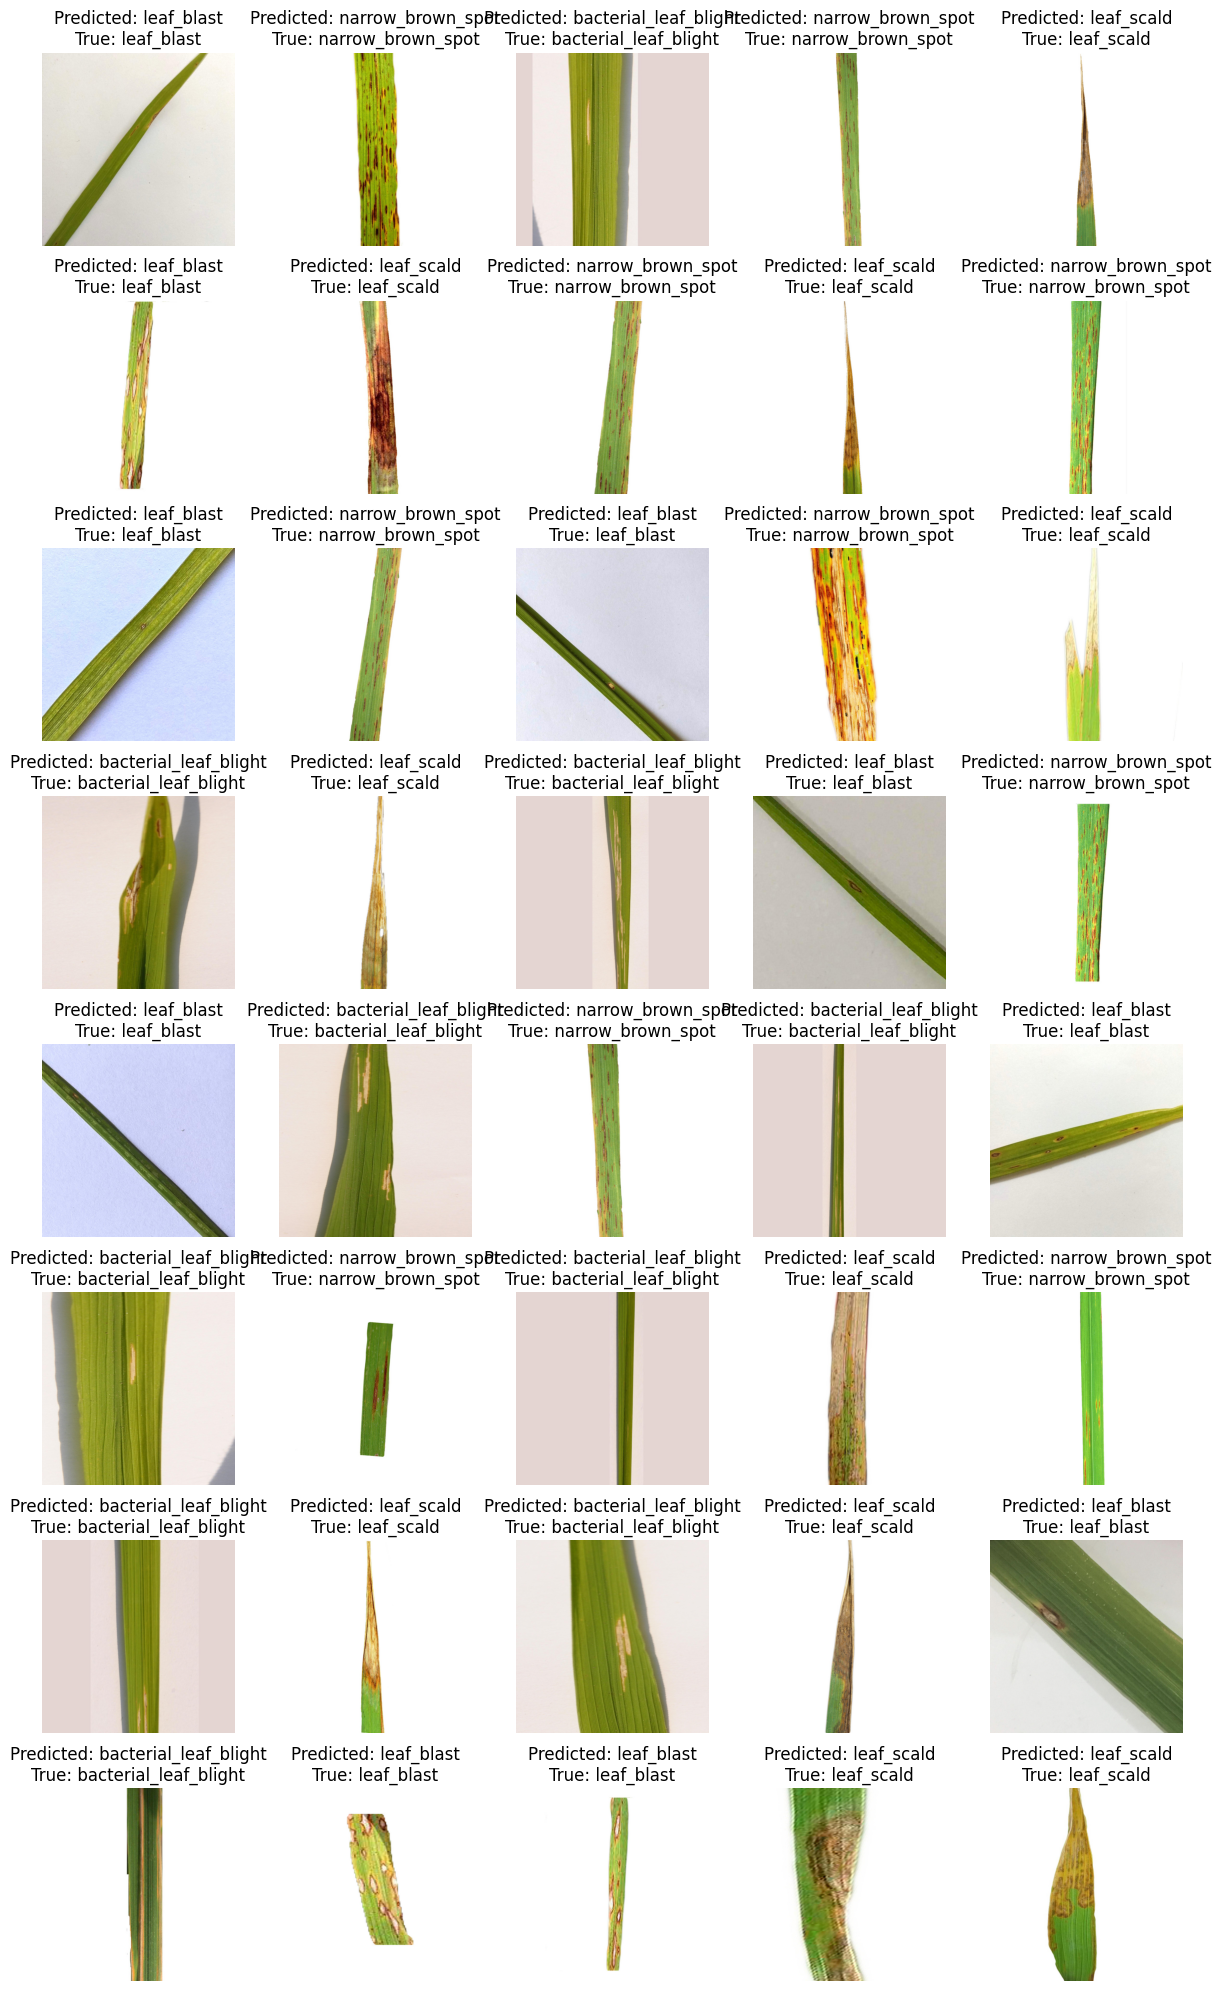

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables to count the number of images per class
class_counts = [0] * len(class_names)

# Initialize lists to store the selected images and their labels
selected_images = []
selected_labels = []

# Iterate through the test dataset to select 10 images per class
for i in range(len(test_generator)):
    test_images, test_labels = next(test_generator)
    predicted_labels = np.argmax(model.predict(test_images), axis=1)

    for j in range(test_images.shape[0]):
        true_label = np.argmax(test_labels[j])

        # Check if the current image belongs to a class that still requires more samples
        if class_counts[true_label] < 10:
            selected_images.append(test_images[j])
            selected_labels.append(true_label)
            class_counts[true_label] += 1

        # Check if all classes have reached the desired number of samples
        if all(count == 10 for count in class_counts):
            break

    # Check if all classes have reached the desired number of samples
    if all(count == 10 for count in class_counts):
        break

# Convert the selected images and labels into NumPy arrays
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Make predictions on the selected images
predicted_labels = np.argmax(model.predict(selected_images), axis=1)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast','bacterial_leaf_blight','narrow_brown_spot']

# Visualize the predicted images and their labels
num_images = selected_images.shape[0]
num_rows = int(np.ceil(num_images / 5))
fig, axes = plt.subplots(num_rows, 5, figsize=(12, 2.5 * num_rows))
axes = axes.ravel()

for i in range(num_images):
    axes[i].imshow(selected_images[i])
    axes[i].set_title("Predicted: {}\nTrue: {}".format(class_names[predicted_labels[i]], class_names[selected_labels[i]]))
    axes[i].axis('off')

# Remove empty subplots
if num_images < len(axes):
    for j in range(num_images, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 228ms/step


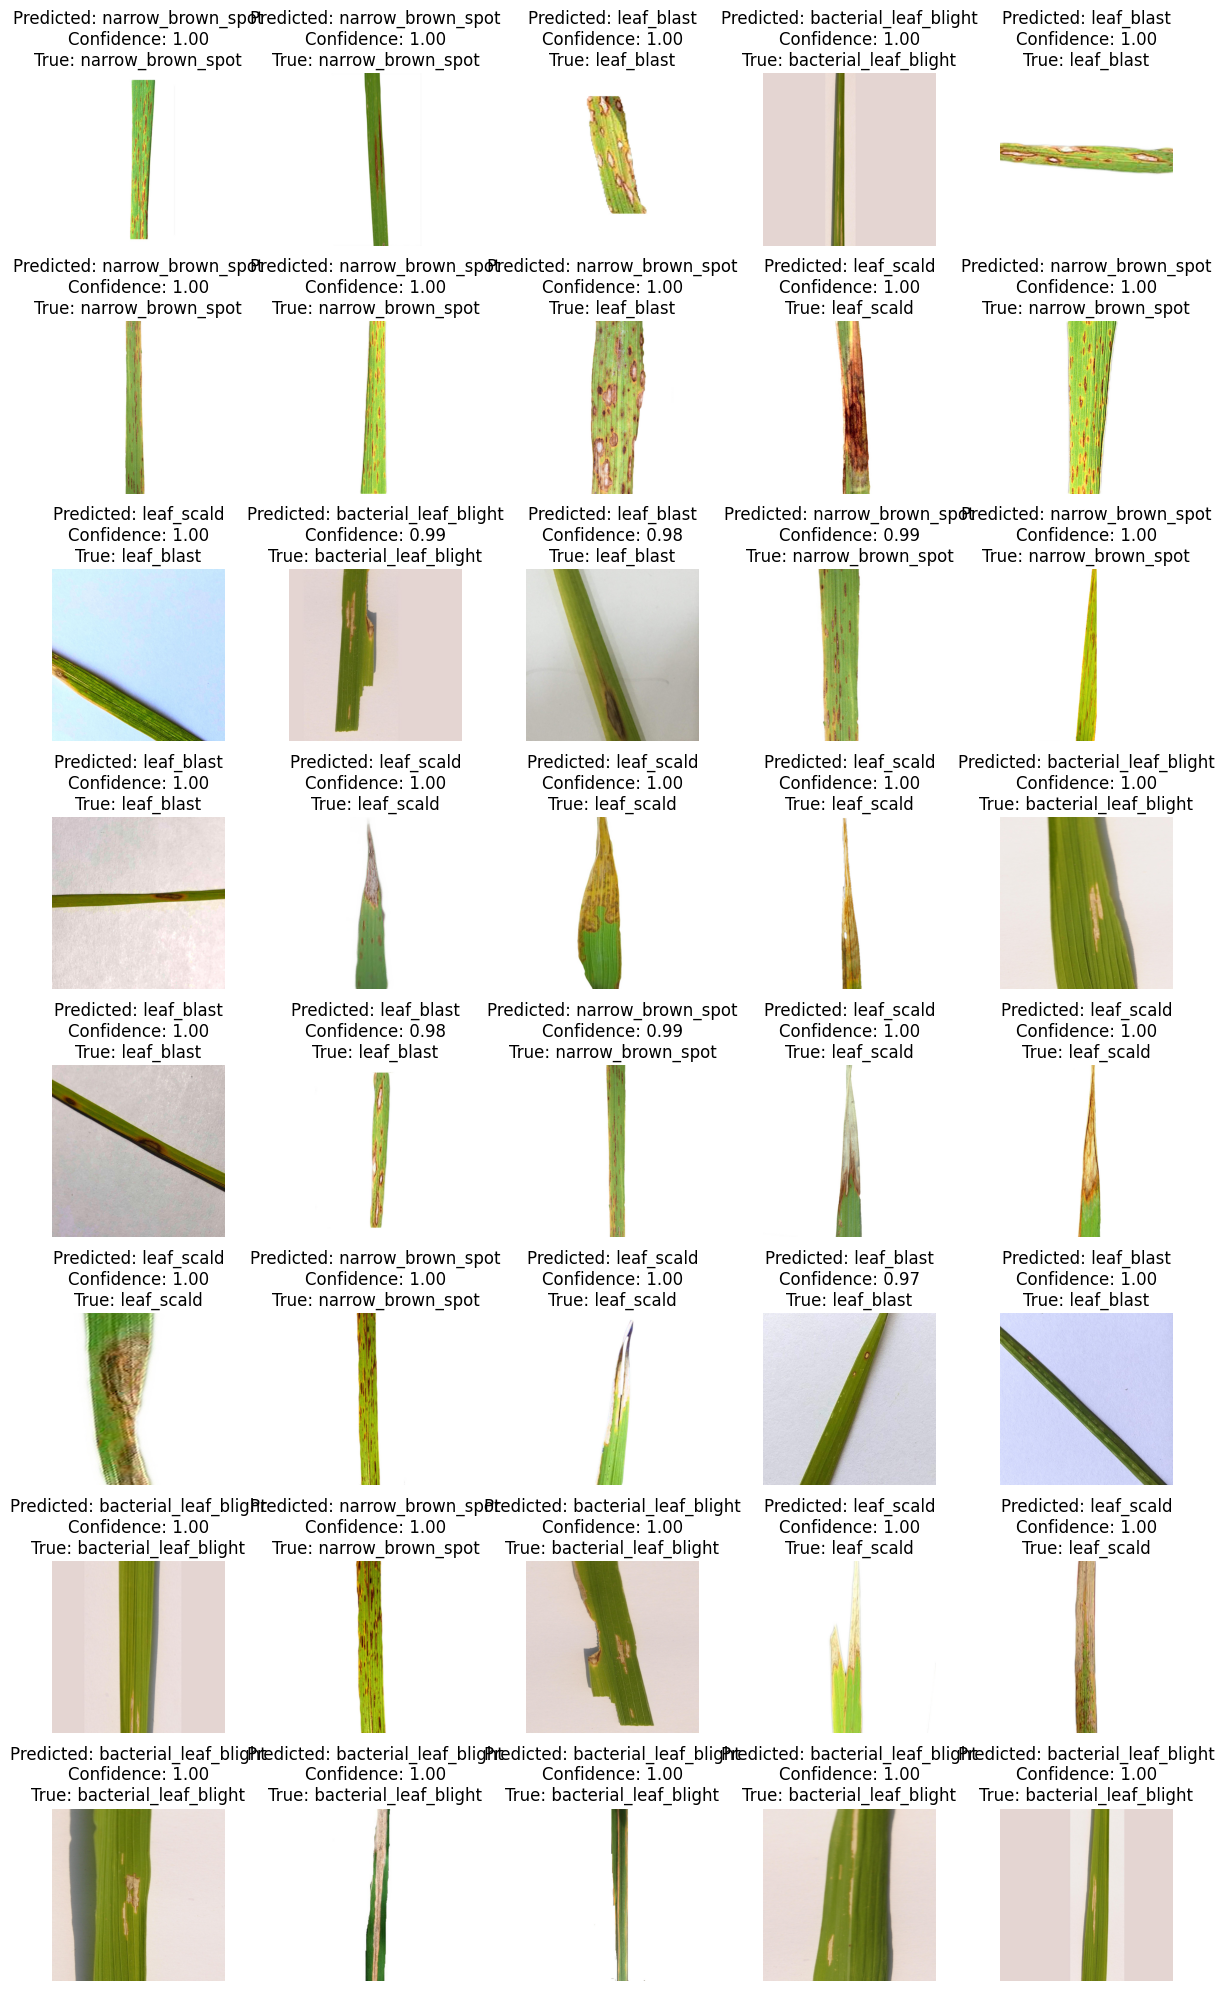

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables to count the number of images per class
class_counts = [0] * len(class_names)

# Initialize lists to store the selected images and their labels
selected_images = []
selected_labels = []
predicted_probabilities = []  # To store the predicted probabilities

# Iterate through the test dataset to select 10 images per class
for i in range(len(test_generator)):
    test_images, test_labels = next(test_generator)
    predicted_labels = np.argmax(model.predict(test_images), axis=1)
    probabilities = model.predict(test_images)

    for j in range(test_images.shape[0]):
        true_label = np.argmax(test_labels[j])

        # Check if the current image belongs to a class that still requires more samples
        if class_counts[true_label] < 10:
            selected_images.append(test_images[j])
            selected_labels.append(true_label)
            predicted_probabilities.append(probabilities[j])
            class_counts[true_label] += 1

        # Check if all classes have reached the desired number of samples
        if all(count == 10 for count in class_counts):
            break

    # Check if all classes have reached the desired number of samples
    if all(count == 10 for count in class_counts):
        break

# Convert the selected images, labels, and probabilities into NumPy arrays
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Make predictions on the selected images
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_confidences = np.max(predicted_probabilities, axis=1)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight','narrow_brown_spot']

# Visualize the predicted images, labels, and confidences
num_images = selected_images.shape[0]
num_rows = int(np.ceil(num_images / 5))
fig, axes = plt.subplots(num_rows, 5, figsize=(12, 2.5 * num_rows))
axes = axes.ravel()

for i in range(num_images):
    axes[i].imshow(selected_images[i])
    axes[i].set_title("Predicted: {}\nConfidence: {:.2f}\nTrue: {}".format(
        class_names[predicted_labels[i]], predicted_confidences[i], class_names[selected_labels[i]]))
    axes[i].axis('off')

# Remove empty subplots
if num_images < len(axes):
    for j in range(num_images, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [25]:
model.save('Rice_Leaf_Disease_Detection.h5')

1/1 [==============================] - 0s 27ms/step
Enter the actual label/name for the image: leaf blast


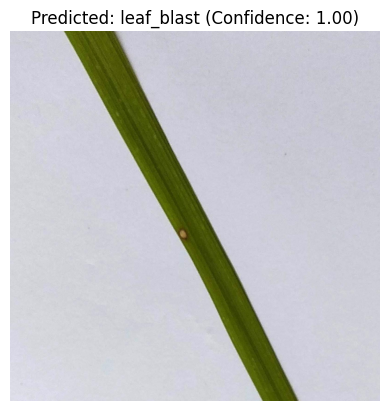

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_blast (345).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 40ms/step
Enter the actual label/name for the image: leaf blast


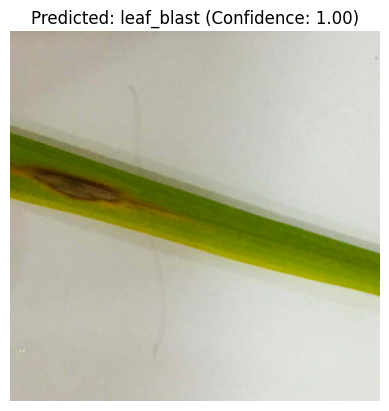

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_blast (333).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 37ms/step
Enter the actual label/name for the image: leaf blast


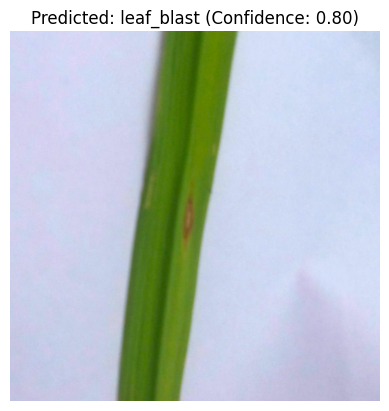

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_blast (339).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 42ms/step
Enter the actual label/name for the image: leaf blast


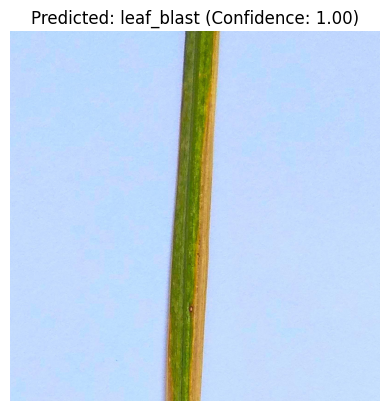

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_blast (322).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 35ms/step
Enter the actual label/name for the image: leaf blast


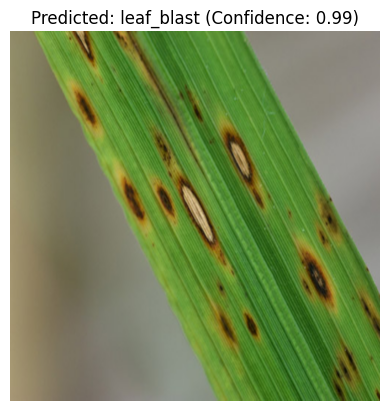

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/lb2.jpeg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 65ms/step
Enter the actual label/name for the image: leaf blast


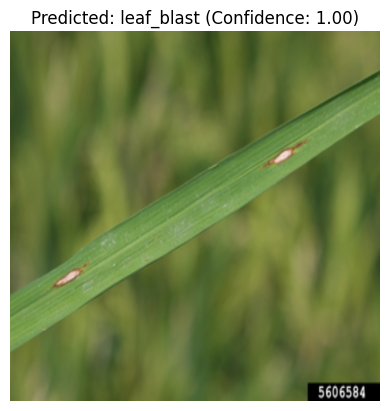

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/lb5.jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 51ms/step
Enter the actual label/name for the image: leaf blast


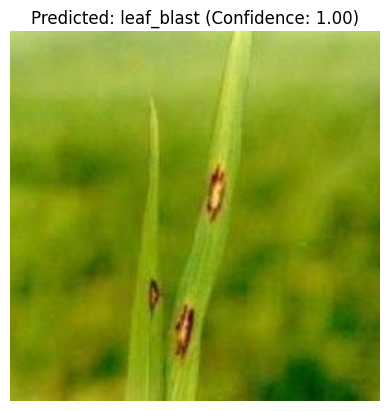

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/lb3.jfif'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 328ms/step
Enter the actual label/name for the image: bacterial leaf blight


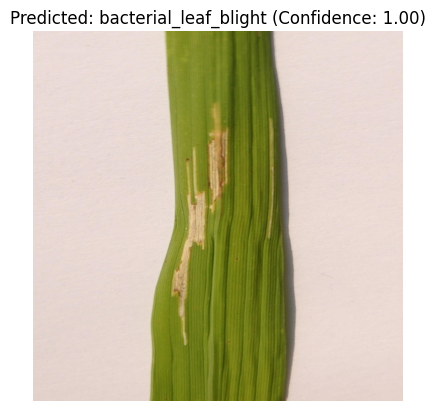

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/bacterial_leaf_blight (322).JPG'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast','bacterial_leaf_blight','narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 27ms/step
Enter the actual label/name for the image: bacterial leaf blight


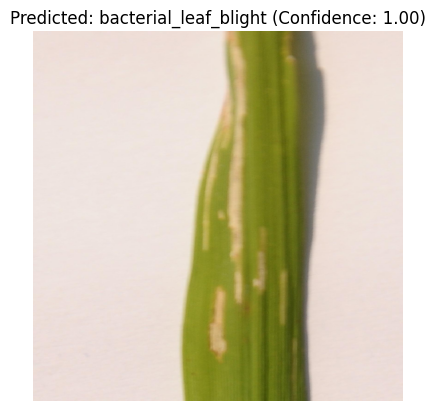

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/bacterial_leaf_blight (335).JPG'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast','bacterial_leaf_blight','narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 196ms/step
Enter the actual label/name for the image: bacterial leaf blight


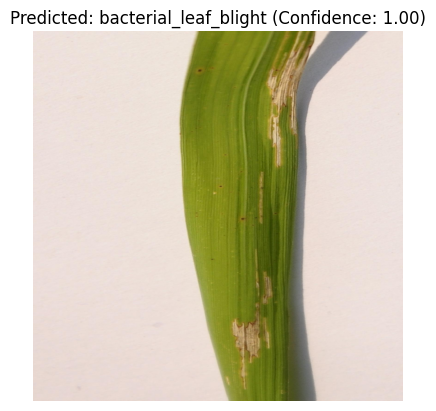

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/bacterial_leaf_blight (346).JPG'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast','bacterial_leaf_blight','narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 40ms/step
Enter the actual label/name for the image: bacterial leaf blight


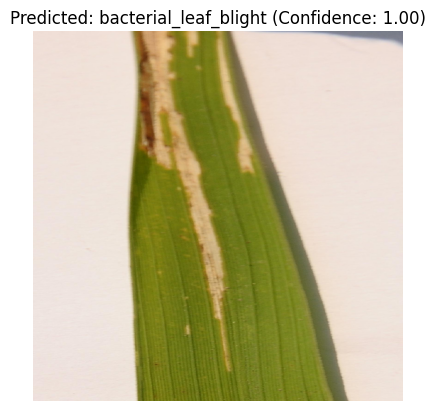

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/bacterial_leaf_blight (339).JPG'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast','bacterial_leaf_blight','narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 74ms/step
Enter the actual label/name for the image: bacterial leaf blight


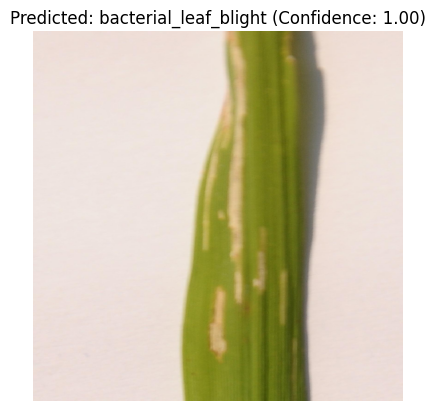

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/bacterial_leaf_blight (335).JPG'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast','bacterial_leaf_blight','narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 96ms/step
Enter the actual label/name for the image: narrow brown spot


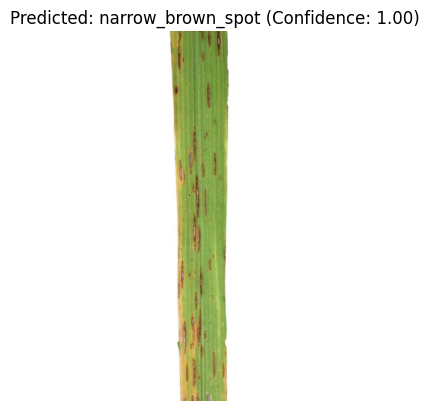

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/narrow_brown (325).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 46ms/step
Enter the actual label/name for the image: narrow brown spot


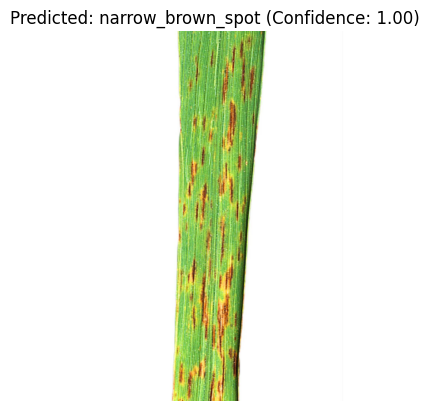

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/narrow_brown (348).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 50ms/step
Enter the actual label/name for the image: narrow brown spot


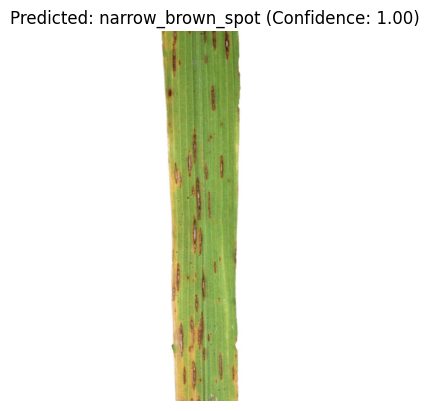

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/narrow_brown (349).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/RiceLeafsDisease/test/narrow_brown_spot/narrow_brown_val (18).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 37ms/step
Enter the actual label/name for the image: narrow brown


1/1 [==============================] - 0s 33ms/step
Enter the actual label/name for the image: leaf scaled


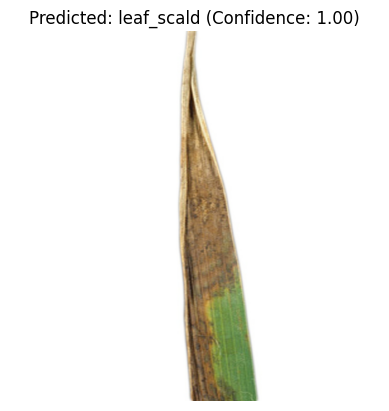

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_scald (342).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 62ms/step
Enter the actual label/name for the image: leaf scaled


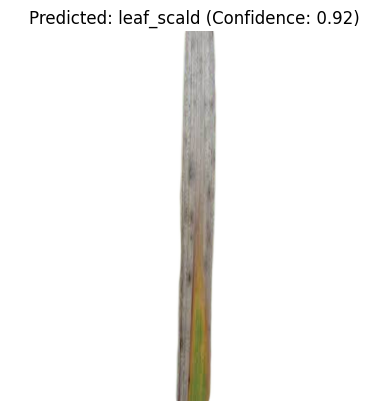

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_scald (335).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 34ms/step
Enter the actual label/name for the image: leaf scaled


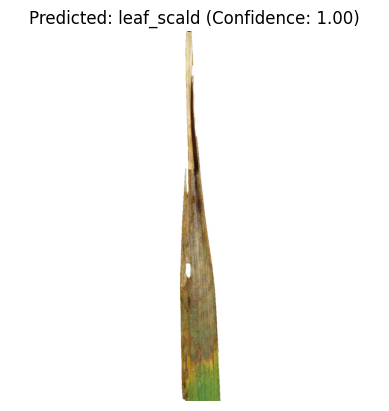

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_scald (327).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 77ms/step
Enter the actual label/name for the image: leaf scaled


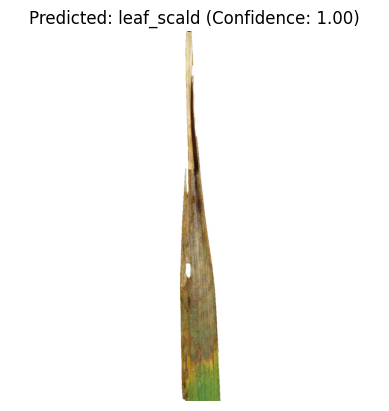

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_scald (328).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


1/1 [==============================] - 0s 35ms/step
Enter the actual label/name for the image: leaf scaled


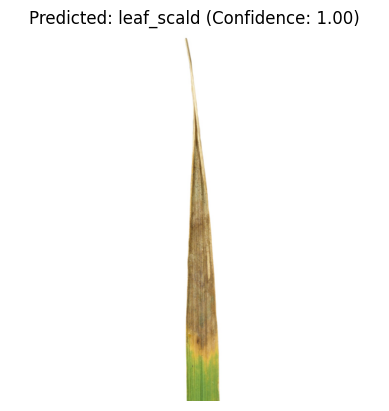

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/samples/leaf_scald (326).jpg'  # Update with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (800, 800))
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions on the image
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_confidence = np.max(predicted_probabilities)

# Define a list of class names in the desired order
class_names = ['leaf_scald', 'leaf_blast', 'bacterial_leaf_blight', 'narrow_brown_spot']

# Display the image
plt.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted: {} (Confidence: {:.2f})'.format(class_names[predicted_label], predicted_confidence))

# Display the actual name entered by you
actual_label = input("Enter the actual label/name for the image: ")
plt.xlabel('Actual: {}'.format(actual_label))

plt.show()


In [110]:
model.save('RiceLeaf_Disease_Detection.h5')

In [127]:
# Print the test accuracy
print('Test Accuracy:', test_acc)

Test Accuracy: 0.9624999761581421


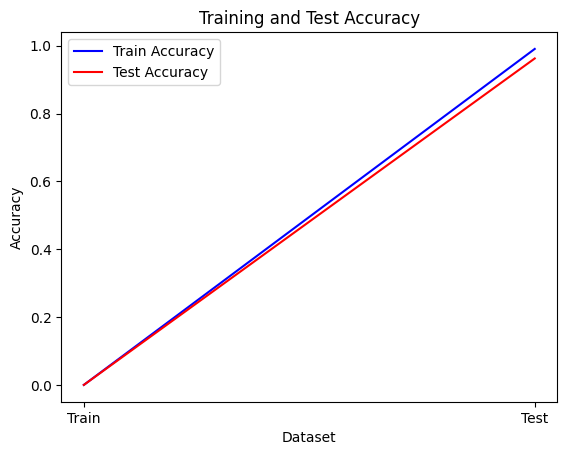

In [131]:
# Plot the accuracy values
plt.plot([0, 1], [0, train_acc], 'b', label='Train Accuracy')
plt.plot([0, 1], [0, test_acc], 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks([0, 1], ['Train', 'Test'])
plt.show()

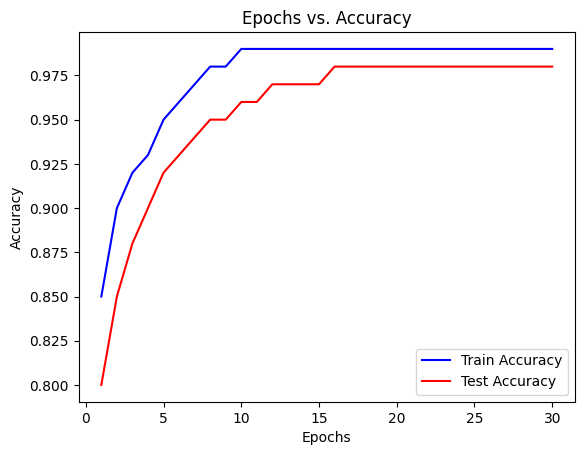

In [140]:
# Number of epochs
epochs = range(1, len(train_acc_values) + 1)

# Plot the accuracy values
plt.plot(epochs, train_acc_values, 'b', label='Train Accuracy')
plt.plot(epochs, test_acc_values, 'r', label='Test Accuracy')
plt.title('Epochs vs. Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()